<a href="https://colab.research.google.com/github/jnalgae/2024S-Ajou-ML/blob/main/HW01_202220735_%EC%A0%95%EC%84%9C%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1 :: EDA & Classification

## 코랩과 구글 드라이브 연동하기

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
# pwd 명령어로 현재 위치 확인
!pwd

/content/drive/My Drive/Colab_Notebooks


In [127]:
!ls

HW01_202220735_정서영.ipynb  HW0.ipynb	Untitled0.ipynb  Untitled1.ipynb


In [128]:
# # 이 노트북 파일이 저장되어 있는 디렉토리 위치까지 옮기기
%cd /content/drive/MyDrive/Colab_Notebooks

/content/drive/MyDrive/Colab_Notebooks


---

## 데이터 불러오기 & 살펴보기

In [129]:
# 이번 과제는 numpy, pandas와 같은 데이터를 불러내고 확인, 처리,
# 수정 등을 쉽게 할 수 있는 library를 사용합니다.

# 모듈 이름 뒤에 as를 쓰고 별칭을 적으면 해당 별칭으로 모듈을 호출할 수 있습니다.
# 모듈명: numpy, 별칭: np => numpy를 쓰는 대신 np를 써서 numpy 호출
# 모듈명: pandas, 별칭: pd => pandas를 쓰는 대신 pd를 써서 pandas 호출
import numpy as np
import pandas as pd

In [130]:
# './'는 이 노트북 파일의 현재 위치를 뜻 합니다.
# 노트북 파일과 같은 위치에 데이터 파일을 두어야 아래와 같이 데이터 파일을 불러올 수 있습니다.
# kaggle 원본 데이터 파일과 다릅니다. 반드시 제공된 데이터를 사용하세요!
path = '/content/drive/MyDrive/marketing_campaign_new.csv'

# pandas의 read_csv 함수를 사용하여 csv파일을 DataFrame으로 불러옵니다.
data = pd.read_csv(path)

In [131]:
# DataFrame 혹은 Series와 같은 자료구조에 shape함수를 통해 데이터의 크기와
# 변수의 갯수를 대략적으로 알 수 있습니다.

data.shape # (10000, 23) => 10000 개의 row(행), 23 개의 column(열)을 가진 데이터

(2240, 27)

In [132]:
# head() 함수를 이용하여 해당 데이터의 맨 위 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.head()

,ID,Gender,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,Z_CostContact,AcceptedCmp,Complain,Response
0,5524,M,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,3,8,10,4,7,VIP,NaN,0,0,1
1,2174,M,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,2,1,1,2,5,common,NaN,0,0,0
2,4141,M,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,...,1,8,2,10,4,VIP,NaN,0,0,0
3,6182,F,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,...,2,2,0,4,6,common,NaN,0,0,0
4,5324,F,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,5,3,6,5,common,NaN,0,0,0


In [133]:
# tail() 함수를 이용하여 해당 데이터의 맨 뒤 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.tail()

,ID,Gender,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,Z_CostContact,AcceptedCmp,Complain,Response
2235,10870,F,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,2,9,3,4,5,VIP,18.0,0,0,0
2236,4001,F,1946,PhD,Married,64014.0,2,1,10-06-2014,56,...,7,8,2,5,7,common,NaN,1,0,0
2237,7270,M,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,1,2,3,13,6,VIP,NaN,4,0,0
2238,8235,M,1956,Master,Married,69245.0,0,1,24-01-2014,8,...,2,6,5,10,3,VIP,93.0,0,0,0
2239,9405,F,1954,PhD,Married,52869.0,1,1,15-10-2012,40,...,3,3,1,4,7,common,29.0,0,0,1


In [134]:
# DataFrame을 이루고 있는 column의 이름을 확인합니다.

data.columns

Index(['ID', 'Gender', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntToyProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Customer Type', 'Z_CostContact', 'AcceptedCmp',
       'Complain', 'Response'],
      dtype='object')

In [135]:
# DataFrame을 이루고 있는 column 별 데이터의 타입을 확인합니다.

data.dtypes

ID                       int64
Gender                  object
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntToyProducts         float64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Customer Type           object
Z_CostContact          float64
AcceptedCmp              int64
Complain                 int64
Response                 int64
dtype: object

In [136]:
# describe()는 각 column에 대해 통계량을 요약해주는 함수입니다.
# 기본적으로 NaN(누락데이터)는 제외하고 데이터 요약이 수행됩니다.

data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,AcceptedCmp,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.248661,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,49.370833,0.584821,0.009375,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,30.033454,1.313666,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,23.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,49.500000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,74.250000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,99.000000,5.000000,1.000000,1.000000


In [137]:
# mode()는 각 컬럼에 대해 최빈값을 계산해주는 함수입니다.
# 기본적으로 NaN(누락데이터)는 제외하고 데이터 요약이 수행됩니다.
# mode() 함수는 모든 컬럼 유형에 대해 작동하며, 숫자형, 문자열, 범주형 데이터 등 모든 컬럼 타입에서 사용할 수 있습니다.

data.mode().iloc[0]

ID                              0
Gender                          M
Year_Birth                 1976.0
Education              Graduation
Marital_Status            Married
Income                    52247.0
Kidhome                       0.0
Teenhome                      0.0
Dt_Customer            31-08-2012
Recency                      56.0
MntWines                      2.0
MntFruits                     0.0
MntMeatProducts               7.0
MntFishProducts               0.0
MntSweetProducts              0.0
MntToyProducts               17.0
MntGoldProds                  1.0
NumDealsPurchases             1.0
NumWebPurchases               2.0
NumCatalogPurchases           0.0
NumStorePurchases             3.0
NumWebVisitsMonth             7.0
Customer Type              common
Z_CostContact                32.0
AcceptedCmp                   0.0
Complain                      0.0
Response                      0.0
Name: 0, dtype: object

## 문제 1 :: 변수의 타입

* 보고서에 설명된 것을 바탕을 주어진 데이터의 변수들의 타입을 보고서에 기술하세요.

  * 작성 형식) : 1. 변수 이름: categorical
  * 작성 예시) 1. ID: Numeric

정답)

* ID:
* Gender:
* Year_Birth:
* Education:
* Marital_Status:
* Income:
* Kidhome:
* Recency:
* MntWines:
* NumWebPurchases:
* AcceptedCmp:
* Complain:
* Customer Type:
* Response:

## 결측값과 중복값 확인하기
결측값과 중복값은 데이터 분석 결과에 큰 영향을 줍니다.   
제공된 데이터에 결측값과 중복값이 있는지 알아봅시다.

In [138]:
# isnull()는 DataFrame에 있는 결측치(NA)를 boolean 값으로 반환하는 함수입니다.
# 결측치가 있으면 True를 반환합니다.

data.isnull().head()

,ID,Gender,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,Z_CostContact,AcceptedCmp,Complain,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [139]:
# isnull()에 sum() 를 결합하여 DataFrame에 있는 결측치의 합을 구합니다.

data.isnull().sum() # 문제3에서 KNN Imputer를 사용하여 결측값을 보정할 예정

ID                        0
Gender                    0
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntToyProducts          225
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
Customer Type             0
Z_CostContact          2000
AcceptedCmp               0
Complain                  0
Response                  0
dtype: int64

In [140]:
# Income에 있는 적은 량의 결측치는 해당 열의 평균으로 채워줍니다.

#data['Income'].fillna(data['Income'].mean(), inplace=True)
mean_income = np.floor(data['Income'].mean())
data['Income'].fillna(mean_income, inplace=True)

In [141]:
# 결측치가 너무 많은 Z_CostContact는 결측값을 보정하여도 유의미한 데이터를 가지지 못하기 떄문에 제거해 줍니다.

data = data.drop(['Z_CostContact'], axis=1)

In [142]:
# duplicated()는 중복된 데이터를 Series 형식으로 반환합니다.

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [143]:
# duplicated()에 sum()을 결합하여 DataFrame에 있는 중복 데이터의 합을 구합니다.

data.duplicated().sum()

0

## 문제 2 :: 데이터 정리


### 문제 2-1
제공된 데이터에서 categorical 변수들을 주어진 조건에 따라 인코딩하고 작성한 코드를 캡처 후 보고서에 업로드 하세요.

* data에서 Gender 열의 데이터 값을 `M`(Male)일 경우 0, `F`(Female)일 경우 1로 인코딩하세요.

* data에서 Customer Type 열의 데이터 값을 `common`일 경우 0, `VIP`일 경우 1로 인코딩하세요.

* data에서 Marital_Status 열의 데이터 값을 `Single`일 경우 0, `Married`일 경우 1, `Divorced`일 경우 2로 인코딩하세요.

* data에서 Education 열의 데이터 값을 `Graduation`일 경우 0, `PhD`일 경우 1, `Master`일 경우 2, `Basic`일 경우 3, `2n Cycle`일 경우 4로 인코딩하세요.

In [144]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [145]:
data['Customer Type'].unique()

array(['VIP', 'common'], dtype=object)

In [146]:
data['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [147]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [148]:
################  문제 2-1  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# Gender column의 M과 F를 각각 0과 1에 맵핑한 뒤 새로운 값으로 전환된 열 반환
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
# Customer Type column의 common과 VIP를 각각 0과 1에 맵핑한 뒤 새로운 값으로 전환된 열 반환
data['Customer Type'] = data['Customer Type'].map({'common': 0, 'VIP': 1})
# Marital_Status column의 Single, Married, Divorced를 각각 0, 1, 2에 맵핑한 뒤 새로운 값으로 전환된 열 반환
data['Marital_Status'] = data['Marital_Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
# Education column의 Graduation, PhD, Master, Basic, 2n Cycle를 각각 0, 1, 2, 3 4에 맵핑한 뒤 새로운 값으로 전환된 열 반환
data['Education'] = data['Education'].map({'Graduation': 0, 'PhD': 1, 'Master': 2, 'Basic': 3, '2n Cycle': 4})

data.head()
# label encoding은 알파벳 순서대로 맵핑을 하기 때문에 문제에 적합하지 않았다.

##################################################


,ID,Gender,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,AcceptedCmp,Complain,Response
0,5524,0,1957,0,0,58138.0,0,0,04-09-2012,58,...,88,3,8,10,4,7,1,0,0,1
1,2174,0,1954,0,0,46344.0,1,1,08-03-2014,38,...,6,2,1,1,2,5,0,0,0,0
2,4141,0,1965,0,1,71613.0,0,0,21-08-2013,26,...,42,1,8,2,10,4,1,0,0,0
3,6182,1,1984,0,1,26646.0,1,0,10-02-2014,26,...,5,2,2,0,4,6,0,0,0,0
4,5324,1,1981,1,1,58293.0,1,0,19-01-2014,94,...,15,5,5,3,6,5,0,0,0,0


In [149]:
# 인코딩한 데이터 열의 데이터 속성을 변환하는 코드
data['Gender'] = data['Gender'].astype('int')
data['Customer Type'] = data['Customer Type'].astype('int')
data['Marital_Status'] = data['Marital_Status'].astype('int')
data['Education'] = data['Education'].astype('int')

### 문제 2-2
오늘 날짜는 2024년 3월 16일 입니다.

`Year_Birth` 열은 현재 년도 단위로 데이터가 구성되어 있습니다.
나이 단위로 데이터를 나타내는 `Age`을 작성하고 캡처하여 보고서에 업로드 하세요.

예)  1957년도 출생 => 2024-1957=67

`DT_Customer` 열은 현재 날짜 단위로 데이터가 구성되어 있습니다.  
년 단위로 데이터를 나타내는 `CustomerTenure`을 작성하고 캡처하여 보고서에 업로드 하세요.

예) 04-09-2012 => (03-16-2024-04-09-2012)/365=11.94 (소수점 셋째자리에서 버림)

**Hint) datetime.strptime**

In [150]:
from datetime import datetime
################  문제 2-2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# 현재 년도에서 Year_Birth의 값을 빼면 나이 단위로 데이터를 나타내는 Age열을 작성할 수 있다.
data['Year_Birth'] = 2024 - data['Year_Birth']

# 주어진 데이터의 형태가 년-월-일, 일-월-년 형태였다.
# 년-월-일 형태를 일-월-년 형태로 변환하기 위해선 해당 string이 어떤 형태인지 알아야 했다.
# -를 기준으로 문자열을 분할하여 첫 문자가 1000보다 크면 해당 문자를 년으로 판단하고,
# 이는 수정이 필요한 형태이므로 '-'를 기준으로 문자열을 분할하고 역순으로 조합하였다.
def convert_date(date_str):
    date_parts = date_str.split('-')  # '-'를 기준으로 문자열을 분할하여 리스트로 반환
    if int(date_parts[0]) > 1000:
      reversed_str = '-'.join(date_parts[::-1])  # 분할된 리스트를 역순으로 조합하여 '-'로 연결
      return datetime.strptime(reversed_str, '%d-%m-%Y')
    else:
      return datetime.strptime(date_str, '%d-%m-%Y')


# 현재 날짜, 마찬가지로 일-월-년 형태이다.
current_date = datetime.strptime('16-03-2024', '%d-%m-%Y')

# Dt_Customer의 값에 대해 convert_date 함수를 호출하여 일-월-년 형태를 갖도록 하였고
# 현재 날짜에서 해당 날짜를 빼고 365로 나눈 다음 round()를 이용해 소수점 둘째 자리까지 나타내었다.
data['Dt_Customer'] = data['Dt_Customer'].apply(lambda x: round((current_date - convert_date(x)).days / 365, 2))

################ 코드 끝 ########################
#################################################

In [152]:
data.head()

,ID,Gender,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,AcceptedCmp,Complain,Response
0,5524,0,67,0,0,58138.0,0,0,11.54,58,...,88,3,8,10,4,7,1,0,0,1
1,2174,0,70,0,0,46344.0,1,1,10.03,38,...,6,2,1,1,2,5,0,0,0,0
2,4141,0,59,0,1,71613.0,0,0,10.58,26,...,42,1,8,2,10,4,1,0,0,0
3,6182,1,40,0,1,26646.0,1,0,10.10,26,...,5,2,2,0,4,6,0,0,0,0
4,5324,1,43,1,1,58293.0,1,0,10.16,94,...,15,5,5,3,6,5,0,0,0,0


### 문제 2-3
`Year_Birth`와 `DT_Customer`, `Recency` 열의 이름을 각각 `Age`와 `CustomerTenure`, `Recency_in_years`로 변경하세요.

**코드를 보고서에 캡처하여 업로드하세요.**

In [153]:
################  문제 2-3  #################
# 열 이름 변경하기
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  ##################

# 데이터 프레임의 특정 열을 바꾸기 위해 rename()을 이용하였다.
data = data.rename(columns = {'Year_Birth' : 'Age', 'Dt_Customer' : 'CustomerTenure', 'Recency' : 'Recency_in_years'})

data.head()

################ 코드 끝  ####################
##############################################

,ID,Gender,Age,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerTenure,Recency_in_years,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,AcceptedCmp,Complain,Response
0,5524,0,67,0,0,58138.0,0,0,11.54,58,...,88,3,8,10,4,7,1,0,0,1
1,2174,0,70,0,0,46344.0,1,1,10.03,38,...,6,2,1,1,2,5,0,0,0,0
2,4141,0,59,0,1,71613.0,0,0,10.58,26,...,42,1,8,2,10,4,1,0,0,0
3,6182,1,40,0,1,26646.0,1,0,10.10,26,...,5,2,2,0,4,6,0,0,0,0
4,5324,1,43,1,1,58293.0,1,0,10.16,94,...,15,5,5,3,6,5,0,0,0,0


### 문제 2-4
`AcceptedCmp`는 고객이 어떤 캠페인에 참여했는지 나타내는 열입니다.

캠페인은 1, 2, 3, 4, 5 가 존재합니다.

**One-hot encoding**(강의노트 2번 10쪽)을 통해 `AcceptedCmp`를 5개의 열로 변경하세요.

예)  `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`

**코드를 보고서에 캡처하여 업로드하세요.**

In [154]:
################  문제 2-4  #################
# 열 이름 변경하기
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  ##################

# AcceptedCmp 열에 get_dummies를 적용함으로써 해당 열을 One-hot encoding한다.
encoded_AceeptedCmp = pd.get_dummies(data['AcceptedCmp'], prefix='AcceptedCmp', prefix_sep='')

# 기존의 AcceptedCmp 열 삭제
data.drop('AcceptedCmp', axis=1, inplace=True)

# get_dummies를 통해 얻은 새로운 데이터 프레임을 기존 데이터프레임과 concatenate
data = pd.concat([data, encoded_AceeptedCmp], axis=1)

# 문제에서 5개의 열로 변경하라고 했으므로
# AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5만 남기고 AceeptedCmp0은 삭제
data.drop('AcceptedCmp0', axis=1, inplace=True)

################ 코드 끝  ####################
##############################################

In [155]:
data.head()

,ID,Gender,Age,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerTenure,Recency_in_years,...,NumStorePurchases,NumWebVisitsMonth,Customer Type,Complain,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,5524,0,67,0,0,58138.0,0,0,11.54,58,...,4,7,1,0,1,0,0,0,0,0
1,2174,0,70,0,0,46344.0,1,1,10.03,38,...,2,5,0,0,0,0,0,0,0,0
2,4141,0,59,0,1,71613.0,0,0,10.58,26,...,10,4,1,0,0,0,0,0,0,0
3,6182,1,40,0,1,26646.0,1,0,10.10,26,...,4,6,0,0,0,0,0,0,0,0
4,5324,1,43,1,1,58293.0,1,0,10.16,94,...,6,5,0,0,0,0,0,0,0,0


## 문제 3 :: KNN Imputer

### **`MntToyProducts`** 열과 연관성이 높은 열 찾기


결측값이 있는 모든 행과 결측값이 없는 데이터 사이의 거리를 구할 수 있지만, 계산 시간이 매우 오려 걸려 `MntToyProducts` 열과 가장 연관성이 높은 `Kidhome` 과의 거리를 기준으로 결측값을 보정합니다.

In [156]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Gender,Age,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerTenure,Recency_in_years,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntToyProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,Complain,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
ID,1.000000,0.010249,-0.000028,-0.017651,0.011032,0.013036,0.002406,-0.002580,-0.000094,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,0.009083,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.006031,0.033883,-0.021968,-0.021614,0.005571,-0.036252,-0.017929,0.002380
Gender,0.010249,1.000000,-0.044213,-0.002854,0.001391,-0.003216,0.013177,0.002470,0.020662,-0.003866,-0.012340,0.007562,-0.012503,-0.018146,0.025821,0.003603,-0.029658,0.026033,-0.012507,-0.026530,-0.002530,0.031582,-0.030706,-0.004546,-0.042239,-0.050732,0.036086,-0.012905,-0.012303,-0.008216
Age,-0.000028,-0.044213,1.000000,-0.036971,0.170129,0.160942,-0.230176,0.352111,-0.022411,0.019871,0.157773,0.017917,0.030872,0.041625,0.018133,-0.191649,0.061818,0.060846,0.145040,0.121275,0.128272,-0.121139,0.090538,0.030128,-0.021325,0.005930,0.014468,-0.048256,0.076014,0.031304
Education,-0.017651,-0.002854,-0.036971,1.000000,0.005904,-0.092242,0.028878,-0.052026,0.000974,-0.025753,-0.067017,-0.060599,-0.075378,-0.029216,-0.036715,0.002855,-0.067252,-0.009192,-0.066299,-0.066781,-0.054023,0.034059,-0.042152,0.001382,-0.018980,-0.028134,0.001242,-0.002372,0.001539,-0.002099
Marital_Status,0.011032,0.001391,0.170129,0.005904,1.000000,0.031406,-0.046232,0.107030,0.009754,0.001056,0.039498,0.009973,-0.030391,-0.000269,0.015914,-0.052649,0.020035,0.043360,0.051162,0.021421,0.030375,0.006647,0.042949,-0.018279,-0.032795,-0.010959,0.029176,-0.016741,0.019690,0.007967
Income,0.013036,-0.003216,0.160942,-0.092242,0.031406,1.000000,-0.425176,0.019018,-0.018577,-0.003947,0.576789,0.428747,0.577802,0.437497,0.436162,-0.355115,0.321978,-0.082290,0.380550,0.586725,0.526489,-0.549824,0.482504,-0.027223,0.132757,0.274921,0.038793,-0.072493,0.104896,0.190280
Kidhome,0.002406,0.013177,-0.230176,0.028878,-0.046232,-0.425176,1.000000,-0.036133,-0.053417,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,0.882415,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.418512,0.040207,-0.080008,-0.172339,-0.053051,0.048906,-0.119915,-0.135727
Teenhome,-0.002580,0.002470,0.352111,-0.052026,0.107030,0.019018,-0.036133,1.000000,0.017468,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.034083,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,0.041650,0.003138,-0.154446,-0.140090,0.013169,-0.021859,0.085458,-0.127341
CustomerTenure,-0.000094,0.020662,-0.022411,0.000974,0.009754,-0.018577,-0.053417,0.017468,1.000000,0.024543,0.166253,0.067037,0.092746,0.080878,0.081332,-0.049221,0.159763,0.218683,0.191968,0.096268,0.110736,0.272538,0.173886,0.033269,0.194576,-0.039692,0.006072,0.014899,0.006121,-0.003689
Recency_in_years,-0.046524,-0.003866,0.019871,-0.025753,0.001056,-0.003947,0.008827,0.016198,0.024543,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.013027,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,0.002826,0.013231,-0.198437,-0.019283,0.011572,-0.040475,0.029306,0.004674


`MntToyProducts` 와 `Kidhome`의 상관 계수가 0.88인 것으로 보아 두 열이 큰 상관 관계를 가짐을 알 수 있습니다.   따라서 두 열만 골라 X라는 데이터프레임을 만듭니다.

In [157]:
X = data[['MntToyProducts', 'Kidhome']]

### 문제 3-1, 3-2
K-Nearest Neighbor Imputation(강의노트 2번 23쪽)을 이용하여 결측치 채우기

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.



### 문제 3-2
주어진 코드틀에 k개의 "MntToyProducts" 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [158]:
from tqdm.notebook import tqdm

In [159]:
class Knn_imputer():
  def __init__(self, n_neighbors):

    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors

  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X

  def predict(self, X):

    for i in tqdm(range(len(X))):
     if pd.isnull(X['MntToyProducts'].iloc[i]): # Arrival Delay 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i]) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기
        sum = 0
         ################  문제 3-2  ####################
         # k개의 "MntToyProducts" 값을 보고 평균 내어
         # 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
        for j in range(self.k):
          sum += sorted_dist[j][1]
        X.at[i, 'MntToyProducts'] = sum // self.k
        ################ 코드 끝  ######################
        ##############################################

    return X['MntToyProducts']

  def dist(self, X, y):
    num_train = X.shape[0]

    X = X.drop(['MntToyProducts'], axis=1)
    y = y.drop(['MntToyProducts'])
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):

    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################
        # 유클리드 거리 계산
        # 두 벡터의 차이의 norm을 구하면 두 벡터 사이의 거리를 나타내는 길이를 구할 수 있다.
        distance = np.linalg.norm(X.iloc[i] - y)

        # 결과를 딕셔너리에 저장
        dist_dict[i] = distance

    ################ 코드 끝  ######################
    ##############################################

    return dist_dict


In [160]:
imputer = Knn_imputer(3)
imputer.fit(X)

# test set에 대해 predict를 진행합니다.
data['MntToyProducts'] = imputer.predict(X) # 오래 걸립니다

  0%|          | 0/2240 [00:00<?, ?it/s]

In [162]:
data.head()

,ID,Gender,Age,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerTenure,Recency_in_years,...,NumStorePurchases,NumWebVisitsMonth,Customer Type,Complain,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,5524,0,67,0,0,58138.0,0,0,11.54,58,...,4,7,1,0,1,0,0,0,0,0
1,2174,0,70,0,0,46344.0,1,1,10.03,38,...,2,5,0,0,0,0,0,0,0,0
2,4141,0,59,0,1,71613.0,0,0,10.58,26,...,10,4,1,0,0,0,0,0,0,0
3,6182,1,40,0,1,26646.0,1,0,10.10,26,...,4,6,0,0,0,0,0,0,0,0
4,5324,1,43,1,1,58293.0,1,0,10.16,94,...,6,5,0,0,0,0,0,0,0,0


In [163]:
X.isnull().sum()

MntToyProducts    0
Kidhome           0
dtype: int64

In [164]:
data.isnull().sum() # 결측값이 채워졌는지 확인

ID                     0
Gender                 0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
CustomerTenure         0
Recency_in_years       0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntToyProducts         0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Customer Type          0
Complain               0
Response               0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
dtype: int64

# 문제 4 :: 데이터 시각화

## 제공된 데이터를 활용하여 아래의 plot들을 그리도록 하고 캡처 후 작성한 보고서에 업로드 하세요.
- 4-1 : **box plot**
- 4-2 : **histogram plot**
- 4-3 : **bar plot**
- 4-4 : **scatter plot**


In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

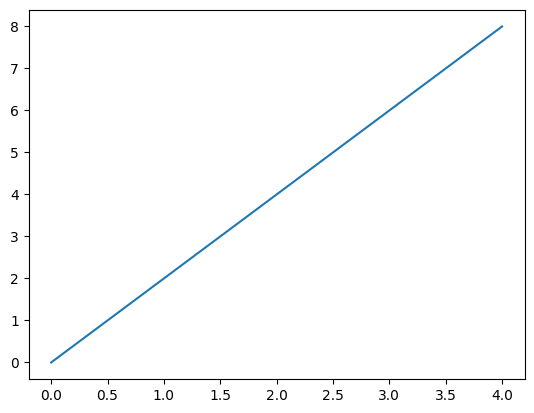

In [166]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

sns.lineplot(x = x, y = y)

In [167]:
df = pd.DataFrame({'x':x, 'y':y})

<Axes: xlabel='x', ylabel='y'>

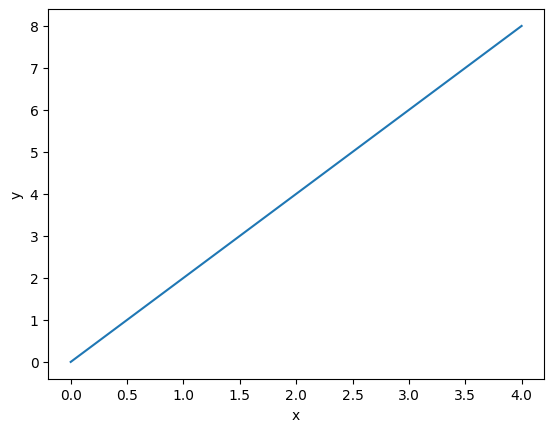

In [168]:
# df를 인자를 주고, 변수를 문자열로 넘겨줘서 사용할 수 있음
sns.lineplot(data=df, x = 'x', y = 'y')

Text(0.5, 1.0, '2')

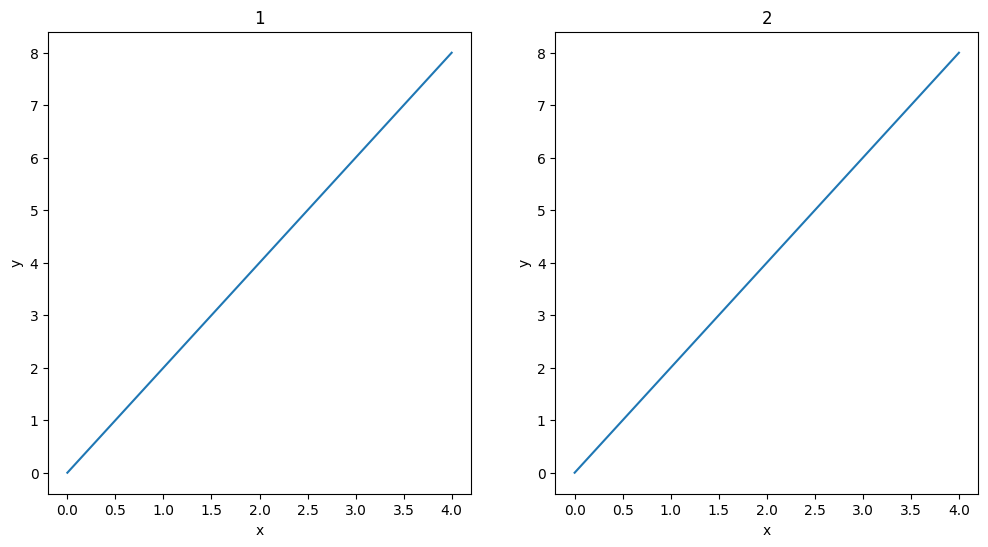

In [169]:
# 복수의 plot을 한번에 그리기

#nrows = 열, ncols = 행 (1,2)개짜리 상자를 만듬
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# 첫 번째 plot
sns.lineplot(data=df, x = 'x', y = 'y', ax=axes[0])
axes[0].set_title('1')

# 두 번째 plot
sns.lineplot(data=df, x = 'x', y = 'y', ax=axes[1])
axes[1].set_title('2')

## 문제 4-1 box plot
`Age`, `Income` 변수에 대해서 각각의 Box plot을 그리고 Treshold를 찾아 Outlier를 제거하시오.


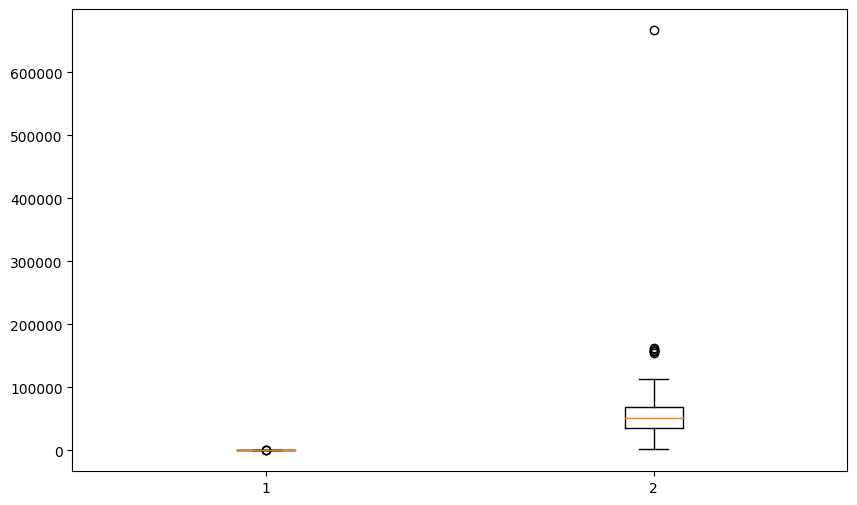

In [170]:
################  문제 4-1  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

plt.figure(figsize=(10, 6))
plt.boxplot([data['Age'], data['Income']])
plt.show()

# Age와 Income 변수에 대한 이상치 제거를 위한 Threshold 찾기
Q1_age = data['Age'].quantile(0.25) # 나이 상위 25% 지점
Q3_age = data['Age'].quantile(0.75) # 나이 하위 25% 지점
IQR_age = Q3_age - Q1_age
AgeThreshold_lower = Q1_age - 1.5 * IQR_age # 이상치로 간주되는 하한 임계값
AgeThreshold_upper = Q3_age + 1.5 * IQR_age # 이상치로 간주되는 상한 임계값

Q1_income = data['Income'].quantile(0.25) # 소득 상위 25% 지점
Q3_income = data['Income'].quantile(0.75) # 소득 하위 25% 지점
IQR_income = Q3_income - Q1_income
IncomeThreshold_lower = Q1_income - 1.5 * IQR_income # 이상치로 간주되는 하한 임계값
IncomeThreshold_upper = Q3_income + 1.5 * IQR_income # 이상치로 간주되는 상한 임계값

AgeTreshold = AgeThreshold_upper
IncomeTreshold = IncomeThreshold_upper

################ 코드 끝  ######################
##############################################
data = data[data.Age < AgeTreshold]
data = data[data.Income < IncomeTreshold]

## 4-2 Histogram plot

`NumWebPurchases`에 대한 히스토그램을 `Marital_Status`을 고려해서 함께 그리시오.

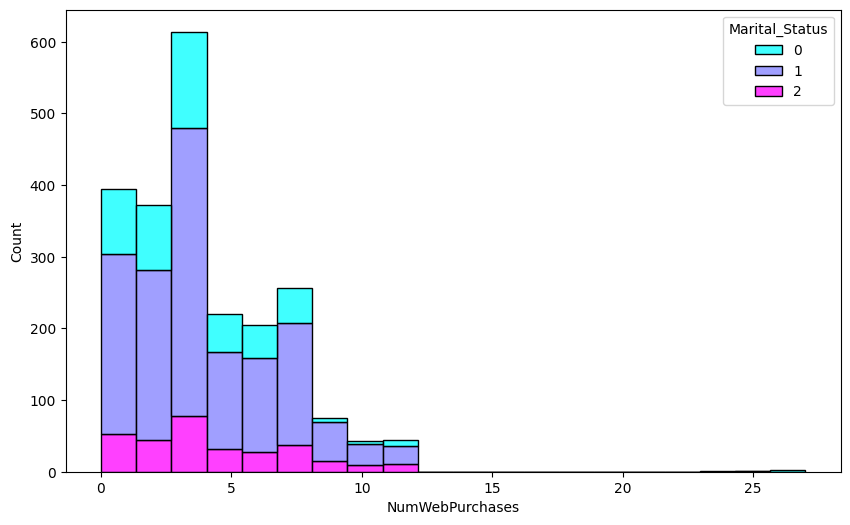

In [171]:
################  문제 4-2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

plt.figure(figsize=(10, 6))
# data: 시각화할 데이터
# x: 데이터에서 x축으로 사용될 열의 이름, NumWebPurchases
# hue: Marital_Status에 따라 색을 다르게 표현
# multiple: 열의 분포를 stack 형태
# bin: 히스토그램 막대의 개수
# palette: colormap 지정
sns.histplot(data=data, x='NumWebPurchases', hue='Marital_Status', multiple='stack', bins=20,
             palette='cool', legend=True)
plt.xlabel('NumWebPurchases')
plt.ylabel('Count')
plt.show()

################ 코드 끝  ######################
##############################################


## 4-3 bar plot

X축 `Marital_Status` Y축을 `NumWebPurchases`로 하고 `Response`를 구분해서 bar plot을 그리시오.


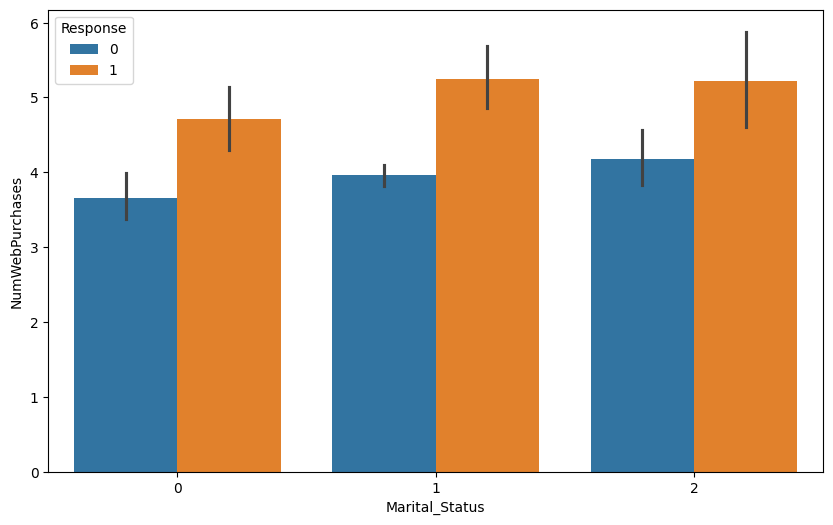

In [172]:
################  문제 4-3  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# Bar plot 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Marital_Status', y='NumWebPurchases', hue='Response')
plt.xlabel('Marital_Status')
plt.ylabel('NumWebPurchases')
plt.legend(title='Response')
plt.show()

################ 코드 끝  ######################
##############################################

## 4-4 scatter plot

`Income`과 가장 높은 상관관계(음,양)를 지니는 변수 2개를 선택하여 scatter plot을 그리시오.

In [173]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Gender,Age,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerTenure,Recency_in_years,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntToyProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,Complain,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
ID,1.000000,0.009176,-0.004888,-0.019926,0.011720,0.001661,0.002702,-0.002839,0.002583,-0.049122,-0.020650,0.007406,-0.000360,-0.022835,-0.006165,0.010356,-0.010391,-0.037051,-0.017914,0.001679,-0.013493,-0.008232,-0.004893,0.031621,-0.021673,-0.021451,0.005665,-0.036143,-0.017787,0.006411
Gender,0.009176,1.000000,-0.037158,-0.000035,0.000454,-0.028263,0.012682,0.002914,0.021172,-0.004534,-0.010272,0.010142,-0.014287,-0.016315,0.027494,0.019320,-0.026734,0.028080,-0.010105,-0.029178,0.000424,0.035057,-0.030860,0.000213,-0.041795,-0.050511,0.036295,-0.012596,-0.012030,-0.005270
Age,-0.004888,-0.037158,1.000000,-0.052028,0.174833,0.211486,-0.234469,0.364148,-0.015731,0.017956,0.162628,0.013360,0.038417,0.042064,0.018938,-0.187341,0.056934,0.074089,0.153410,0.140002,0.138852,-0.119885,0.100175,0.004380,-0.018918,0.007949,0.015468,-0.047727,0.079611,0.016744
Education,-0.019926,-0.000035,-0.052028,1.000000,0.006325,-0.100401,0.028228,-0.052905,0.002796,-0.027019,-0.066124,-0.060026,-0.074275,-0.028544,-0.035974,0.002098,-0.067008,-0.008091,-0.065462,-0.065666,-0.052916,0.034570,-0.040608,-0.009867,-0.018419,-0.027833,0.001378,-0.001999,0.001883,-0.001918
Marital_Status,0.011720,0.000454,0.174833,0.006325,1.000000,0.031384,-0.047104,0.109864,0.009840,-0.001783,0.040752,0.010547,-0.031885,0.000527,0.016693,-0.048781,0.020686,0.044970,0.053044,0.021710,0.032886,0.009063,0.043749,-0.027320,-0.032280,-0.010610,0.029362,-0.016417,0.020055,0.007904
Income,0.001661,-0.028263,0.211486,-0.100401,0.031384,1.000000,-0.527213,0.042271,-0.024815,0.006777,0.728021,0.535246,0.693754,0.549958,0.549835,-0.396759,0.412596,-0.131051,0.493599,0.706752,0.683315,-0.644450,0.595510,-0.027517,0.174419,0.342897,0.049896,-0.080711,0.134591,0.234405
Kidhome,0.002702,0.012682,-0.234469,0.028228,-0.047104,-0.527213,1.000000,-0.036461,-0.054559,0.009144,-0.498230,-0.373563,-0.443248,-0.388645,-0.371720,0.755217,-0.351059,0.231266,-0.365123,-0.517305,-0.504817,0.448826,-0.418458,0.036294,-0.080514,-0.172910,-0.053224,0.048826,-0.120339,-0.134943
Teenhome,-0.002839,0.002914,0.364148,-0.052905,0.109864,0.042271,-0.036461,1.000000,0.018702,0.016246,0.003899,-0.177128,-0.267046,-0.205301,-0.163651,-0.032687,-0.021478,0.395713,0.154624,-0.111976,0.048310,0.133056,0.041254,0.007442,-0.155726,-0.140964,0.013012,-0.022445,0.085171,-0.126410
CustomerTenure,0.002583,0.021172,-0.015731,0.002796,0.009840,-0.024815,-0.054559,0.018702,1.000000,0.026882,0.166294,0.067046,0.092451,0.080650,0.081187,-0.044948,0.160630,0.221229,0.192091,0.095452,0.110164,0.274124,0.173071,0.035850,0.194612,-0.040025,0.005998,0.014683,0.005915,-0.002821
Recency_in_years,-0.049122,-0.004534,0.017956,-0.027019,-0.001783,0.006777,0.009144,0.016246,0.026882,1.000000,0.016797,-0.003376,0.026651,0.001694,0.023071,0.013040,0.017559,-0.002780,-0.010256,0.030805,0.001671,-0.020849,0.003420,0.005404,-0.199078,-0.019317,0.011617,-0.040577,0.029422,0.006021


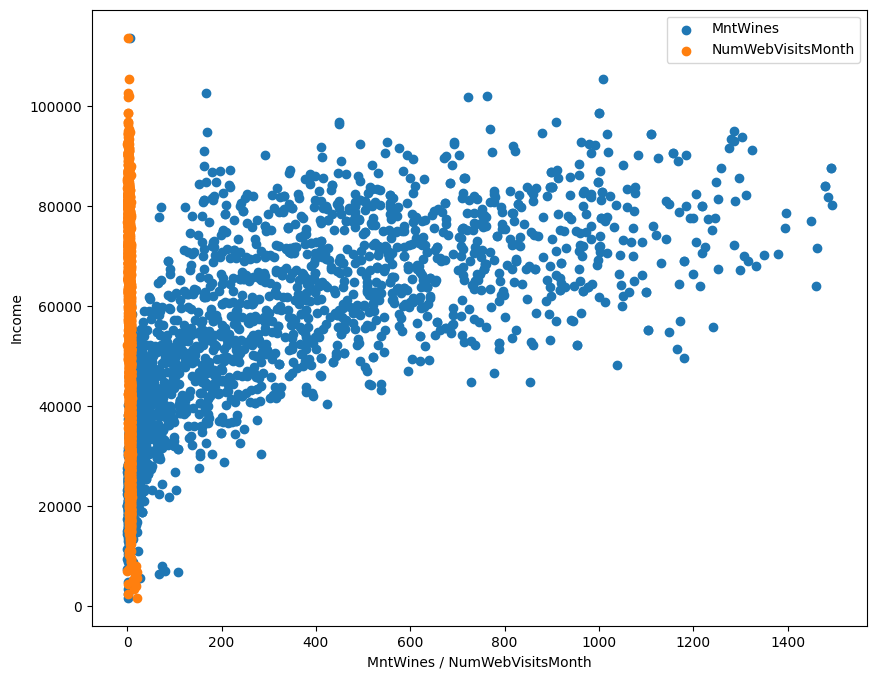

In [174]:
################  문제 4-4  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# Income을 제외한 가장 큰 양의 상관관계를 가지는 변수
highest_corr_vars = corr['Income'].sort_values(ascending=False).index[1]
# 가장 높은 음의 상관관계를 가지는 변수
lowest_corr_vars = corr['Income'].sort_values(ascending=True).index[0]
# print(highest_corr_vars, lowest_corr_vars) >> MntWines NumWebVisitsMonth

# scatter plot 그리기
plt.figure(figsize=(10, 8))
plt.scatter(data[highest_corr_vars], data['Income'], label=highest_corr_vars)
plt.scatter(data[lowest_corr_vars], data['Income'], label=lowest_corr_vars)
plt.xlabel(highest_corr_vars + ' / ' + lowest_corr_vars)
plt.ylabel('Income')
plt.legend()
plt.show()

################ 코드 끝  ######################
##############################################

## 문제 5
- **데이터셋 분리**
- **Knn 학습 및 하이퍼파라미터 비교 그래프 그리기**
- **Decision Tree 및 하이퍼파라미터 비교 그래프 그리기**
- **최종 모델 평가 및 비교**

### train set과 test set 나누기

In [175]:
# train과 test set을 나누기 위한 함수
from sklearn.model_selection import train_test_split

In [176]:
# 5-1 . 데이터 스플릿
from sklearn.model_selection import train_test_split
y = data['Response'] # 정답 분리
X = data.drop(columns =['Response']) # Train셋에 정답이 있으면 안됩니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test:train = 8:2

### 문제 5-1
**`KNeighborsClassifier`**를 사용하여 주어진 조건에 맞게 모델을 학습하고 완성한 코드를 보고서에 캡처하여 업로드하세요.
* 조건 1: neighbor의 수 `k= [1, 3, 5, 15, 55, 101, 501]`으로 변화에 따른 정확도의 변화를
`line plot`으로 그리고 가장 높은 성능의 `k`를 출력하시오.
* 조건 2: train set에서 validation set을 나누세요. `train : validation = 7 : 3`

* *주의! : test set이 아닌 validation set으로 평가해야 합니다.*

In [177]:
from sklearn.neighbors import KNeighborsClassifier

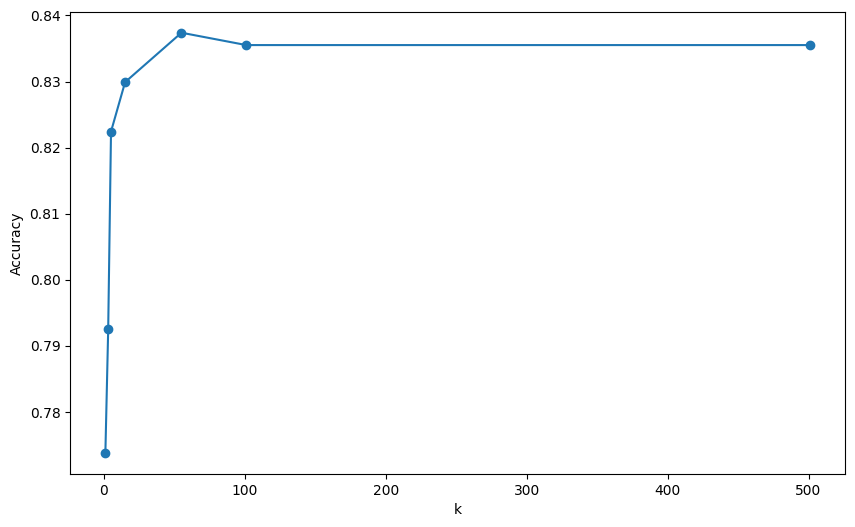

55


In [178]:
################  문제 5-1  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

train_input, val_input, train_target, val_target = train_test_split(X_train, y_train, test_size=0.3)

# 주어진 neighbor의 수 k를 저장할 리스트
numK = [1, 3, 5, 15, 55, 101, 501]

# 각 k 값에 따른 정확도를 저장할 리스트
knn_scores = []


# k 값의 변화에 따른 모델의 성능 평가 및 정확도 저장
for k in numK:
    # KNeighborsClassifier 모델 생성
    knn = KNeighborsClassifier(n_neighbors=k)
    # 모델 학습
    knn.fit(train_input, train_target)
    # 모델 평가
    accuracy = knn.score(val_input, val_target)
    knn_scores.append(accuracy)

# Line plot 그리기
plt.figure(figsize=(10, 6))
plt.plot(numK, knn_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# 가장 높은 성능의 k 값 출력
best_k = numK[knn_scores.index(max(knn_scores))]
print(best_k)

################ 코드 끝  ######################
##############################################

<Axes: >

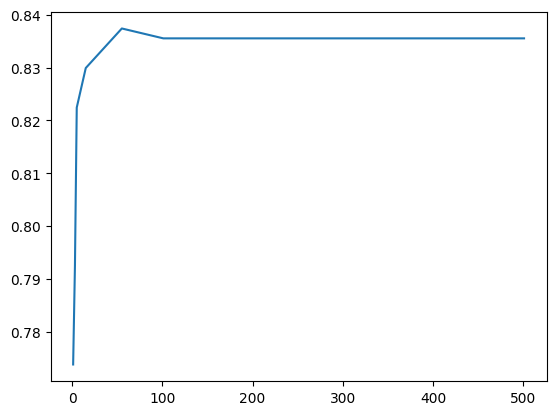

In [179]:
sns.lineplot(x = numK, y = knn_scores)

### 문제 5-2
**`DecisionTreeClassifier`**를 사용하여 주어진 조건에 맞게 모델을 학습하고 완성한 코드 및 출력물을 보고서에 캡처하여 업로드하세요.
* 조건 1: 최대 트리의 깊이를 `depth  = [1, 3, 5, 10, 15, 30, 20]`으로 변화에 따른 정확도의 변화를 `line plot`으로 그리고 가장 높은 성능의 `depth`를 출력하시오.
* 조건 2: train set에서 validation set을 나누세요. `train : validation = 7 : 3`

* *주의! : test set이 아닌 validation set으로 평가해야 합니다.*

In [180]:
from sklearn.tree import DecisionTreeClassifier

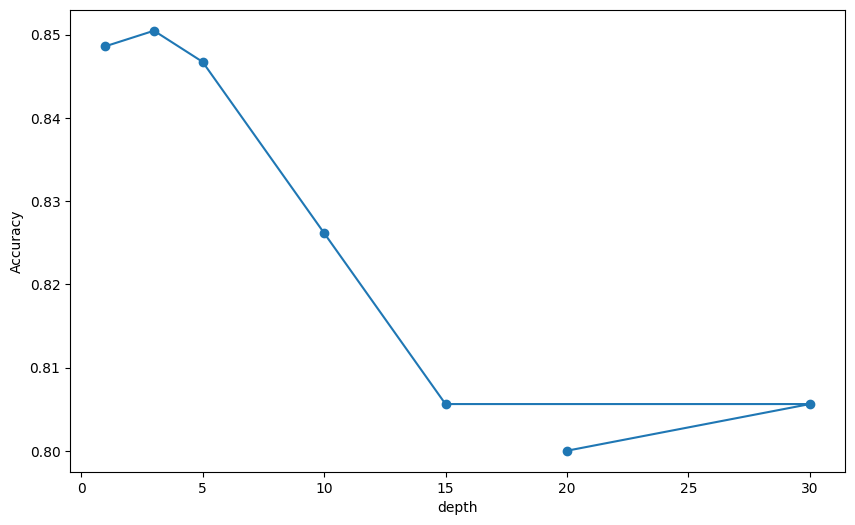

3


In [181]:
################  문제 5-2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################
num_dep = [1, 3, 5, 10, 15, 30, 20]

dt_scores = []

for dep in num_dep:
  Dt = DecisionTreeClassifier(max_depth=dep)
  Dt.fit(train_input, train_target)
  dt_scores.append(Dt.score(val_input, val_target))

# Line plot 그리기
plt.figure(figsize=(10, 6))
plt.plot(num_dep, dt_scores, marker='o')
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.show()

best_dep = num_dep[dt_scores.index(max(dt_scores))]
print(best_dep)
################ 코드 끝  ######################
##############################################

<Axes: >

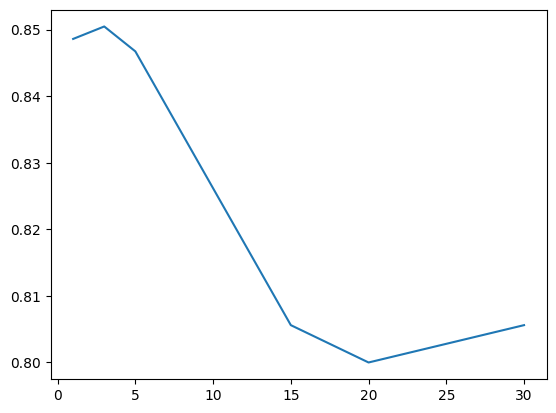

In [182]:
sns.lineplot(x = num_dep, y = dt_scores)

### 문제 5-3
`문제 5-1` 과 `문제 5-2`에서 찾은 best 하이퍼파라미터 (k, max depth)로 두 분류기를 전체 train set 다시 각각 학습하여 test set으로 평가하고 완성한 코드와 출력을 보고서에 캡처하여 업로드하세요.

* 위에서 찾은 최적의 하이퍼파라미터 선택
* 전체 train set으로 분류기 학습
* Test set을 통해서 평가 및 비교

In [183]:
################  문제 5-2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# best 하이퍼파라미터 대입
best_k = best_k
best_depth = best_dep

# 새로운 knn 생성 및 훈련
new_knn = KNeighborsClassifier(n_neighbors=best_k)
new_knn.fit(X_train, y_train)

# 새로운 트리 모델 생성 및 훈련
new_dt = DecisionTreeClassifier(max_depth=best_dep)
new_dt.fit(X_train, y_train)

# test set으로 평가
Knn_acc = new_knn.score(X_test, y_test)
DT_acc = new_dt.score(X_test, y_test)

print(Knn_acc)
print(DT_acc)
################ 코드 끝  ######################
##############################################

0.8609865470852018
0.852017937219731


# 깃허브에 업로드하기
* colab with github 문서 참고